Doing analysis on books_data and ratings_data like:

- Number of unique books

- Number of unique users

- Author who has written maximum number of books from the data

- Best rated books

- User who has rated maximum number of books

- Maximum ratings given in the range 1-5

- Books which have not yet been rated


In [16]:
#Libraries used
%matplotlib inline
import pandas as pd
import numpy as np

In [18]:
#Impoting the csv files
books_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/samples/books.csv')
ratings_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/samples/ratings.csv')
book_tags_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/samples/book_tags.csv')
tags_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/samples/tags.csv')
to_read_data=pd.read_csv('https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/samples/to_read.csv')

In [19]:
#display first 5 rows of books_data
books_data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [20]:
#display first 5 rows of ratings_data
ratings_data.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [21]:
#Number of unique books by Id
print(books_data.book_id.unique())
print('Number of unique books by Id = ',len(books_data.book_id.unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Number of unique books by Id =  99


In [22]:
#Number of unique books by title
book_titles=books_data.original_title
print(book_titles.unique())
print('\nNumber of unique books by title = ',len(book_titles.unique()))
print('Total number of books = ',len(book_titles))

['The Hunger Games' "Harry Potter and the Philosopher's Stone" 'Twilight'
 'To Kill a Mockingbird' 'The Great Gatsby' 'The Fault in Our Stars'
 'The Hobbit or There and Back Again' 'The Catcher in the Rye'
 'Angels & Demons ' 'Pride and Prejudice' 'The Kite Runner ' 'Divergent'
 'Nineteen Eighty-Four' 'Animal Farm: A Fairy Story'
 'Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944'
 'Män som hatar kvinnor' 'Catching Fire'
 'Harry Potter and the Prisoner of Azkaban' ' The Fellowship of the Ring'
 'Mockingjay' 'Harry Potter and the Order of the Phoenix'
 'The Lovely Bones' 'Harry Potter and the Chamber of Secrets'
 'Harry Potter and the Goblet of Fire'
 'Harry Potter and the Deathly Hallows' 'The Da Vinci Code'
 'Harry Potter and the Half-Blood Prince' 'Lord of the Flies '
 'An Excellent conceited Tragedie of Romeo and Juliet' 'Gone Girl'
 'The Help' 'Of Mice and Men ' 'Memoirs of a Geisha' 'Fifty Shades of Grey'
 'O Alquimista' 'The Giver' 'The Lion, the Witch and the Wardro

In [23]:
from collections import Counter
dup_titles=[item for item,count in Counter(book_titles).items() if count>1]
print(dup_titles)
print('\nNumber of duplicate titled books:',len(dup_titles))

[]

Number of duplicate titled books: 0


In [24]:
#Number of Unique users
print('\nNumber of unique users:',len(ratings_data.user_id.unique()))


Number of unique users: 5


In [25]:
#Total number of ratings given by users
print('Total number of ratings given by users: ',len(ratings_data))

Total number of ratings given by users:  99


In [26]:
#Top Author with maximum number of books
#np.bincount(books_data.authors).argmax()
from collections import Counter
author_freq = (word for word in books_data.authors if word[:1].isupper())
c = Counter(author_freq)
print (c.most_common(10))

[('J.K. Rowling, Mary GrandPré', 6), ('Stephenie Meyer', 5), ('E.L. James', 3), ('John Green', 3), ('Suzanne Collins', 3), ('Khaled Hosseini', 2), ('Dan Brown', 2), ('J.R.R. Tolkien', 2), ('Stieg Larsson, Reg Keeland', 2), ('Veronica Roth', 2)]


for r in ratings_data:
    print(r)
    if r.rating==5:
        for b in books_data:
            if r.book_id==b.book_id:
                print (b.original_title)

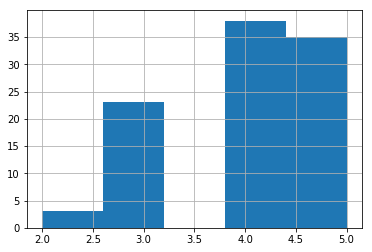

In [27]:
#Maximum ratings given in the range 1-5
ratings_data.rating.hist( bins = 5 )

In [28]:
#User who has rated max number of books
from collections import Counter
user_freq = (word for word in ratings_data.user_id)
c = Counter(user_freq)
print ('Top 10 Users and the number of books they have rated: ',c.most_common(10))

Top 10 Users and the number of books they have rated:  [(4, 59), (8, 20), (2, 11), (1, 8), (6, 1)]


In [29]:
rating5=ratings_data.loc[ratings_data['rating']==5]

In [30]:
rating5['book_id'].unique()

array([ 258,  260, 9296,  301, 2686, 3753, 8519,   18,   27,   21,    2,
         23,   24,  103,   35,  325, 2732, 3020, 4622, 9114,   14, 2584,
         55,  778,  493,  362,  529, 5425, 1237,   36,  102,  693, 1796,
         87,   42])

In [32]:
books_data.loc[books_data['book_id'].isin(rating5['book_id'].unique())]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
13,14,7613,7613,2207778,896,452284244,9.780452e+12,George Orwell,1945.0,Animal Farm: A Fairy Story,...,1881700,1982987,35472,66854,135147,433432,698642,648912,https://images.gr-assets.com/books/1424037542m...,https://images.gr-assets.com/books/1424037542s...
17,18,5,5,2402163,376,043965548X,9.780440e+12,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,Harry Potter and the Prisoner of Azkaban,...,1832823,1969375,36099,6716,20413,166129,509447,1266670,https://images.gr-assets.com/books/1499277281m...,https://images.gr-assets.com/books/1499277281s...
20,21,2,2,2809203,307,439358078,9.780439e+12,"J.K. Rowling, Mary GrandPré",2003.0,Harry Potter and the Order of the Phoenix,...,1735368,1840548,28685,9528,31577,180210,494427,1124806,https://images.gr-assets.com/books/1387141547m...,https://images.gr-assets.com/books/1387141547s...
22,23,15881,15881,6231171,398,439064864,9.780439e+12,"J.K. Rowling, Mary GrandPré",1998.0,Harry Potter and the Chamber of Secrets,...,1779331,1906199,34172,8253,42251,242345,548266,1065084,https://images.gr-assets.com/books/1474169725m...,https://images.gr-assets.com/books/1474169725s...
23,24,6,6,3046572,332,439139600,9.780439e+12,"J.K. Rowling, Mary GrandPré",2000.0,Harry Potter and the Goblet of Fire,...,1753043,1868642,31084,6676,20210,151785,494926,1195045,https://images.gr-assets.com/books/1361482611m...,https://images.gr-assets.com/books/1361482611s...
26,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,...,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...
34,35,865,865,4835472,458,61122416,9.780061e+12,"Paulo Coelho, Alan R. Clarke",1988.0,O Alquimista,...,1299566,1403995,55781,74846,123614,289143,412180,504212,https://images.gr-assets.com/books/1483412266m...,https://images.gr-assets.com/books/1483412266s...
35,36,3636,3636,2543234,192,385732554,9.780386e+12,Lois Lowry,1993.0,The Giver,...,1296825,1345445,54084,26497,59652,225326,448691,585279,https://images.gr-assets.com/books/1342493368m...,https://images.gr-assets.com/books/1342493368s...
41,42,1934,1934,3244642,1707,451529308,9.780452e+12,Louisa May Alcott,1868.0,Little Women,...,1257121,1314293,17090,31645,70011,250794,426280,535563,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [36]:
print(ratings_data)

    user_id  book_id  rating
0         1      258       5
1         2     4081       4
2         2      260       5
3         2     9296       5
4         2     2318       3
5         2       26       4
6         2      315       3
7         2       33       4
8         2      301       5
9         2     2686       5
10        2     3753       5
11        2     8519       5
12        4       70       4
13        4      264       3
14        4      388       4
15        4       18       5
16        4       27       5
17        4       21       5
18        4        2       5
19        4       23       5
20        4       24       5
21        4      964       4
22        4      103       5
23        4      255       2
24        4       35       5
25        4      287       3
26        4      337       4
27        4       26       3
28        4       84       4
29        4       58       4
..      ...      ...     ...
69        4      200       4
70        4       13       4
71        4   